100000.5


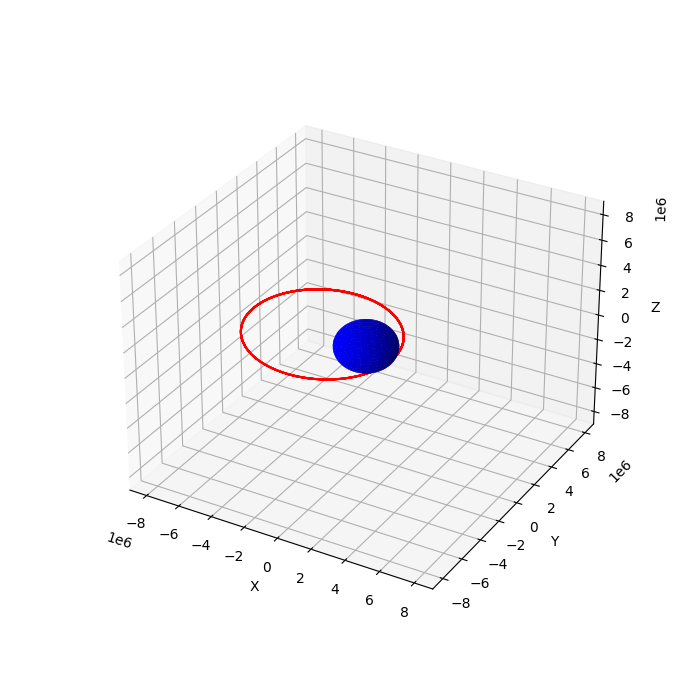

In [52]:
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
# Bundeled Data for visualisation
XBundle = []
YBundle = []
ZBundle = []

# Initial Small Object Conditions
XPos1 = 1737400 + 100000
YPos1 = 1
ZPos1 = 1

XVel1 = 0
YVel1 = 2000
ZVel1 = 500

XAccel1 = 0
YAccel1 = 0
ZAccel1 = 0

# Large Object Conditions
XPos2 = 0
YPos2 = 0
ZPos2 = 0


Object2Mass = 7.3476731e+22
Object2Radius = 1737400 

# Physics Constants
GravConstant =  6.67e-11

# Physics update steps per second and max simulation time

StepsPerSecond = int(input("How many physics simulation steps per second? "))
MaxSimulationTime = int(input("How long would you like the simulation to be (in seconds)? "))

# Definitions before simulation
velbundley = []
velbundlex = []
velbundlez = []


velbundlet = []
timebundle = []
dt = 1 / StepsPerSecond
t = 0
counter = 0


# Movement and position updates, the equations are derived from the universal gravitational equation and trigonometry.
simulating = True
while simulating == True:
    # t is the current time, dt is the change in time that is defined by StepsPerSecond
    t = t + dt
    
    # Tracking positions and velocities of X and Y over time by storing them in lists that are equivelant to the time steps
    XBundle.append(XPos1)
    YBundle.append(YPos1)
    ZBundle.append(ZPos1)
    
    velbundley.append(YVel1)
    velbundlex.append(XVel1)
    velbundlez.append(ZVel1)
    
    TotalVel = (XVel1 ** 2) + (YVel1 ** 2) + (ZVel1 ** 2)
    
    velbundlet.append(TotalVel)
    timebundle.append(t)
    
    
    XSeperation = (XPos1 - XPos2)
    YSeperation = (YPos1 - YPos2)
    ZSeperation = (ZPos1 - ZPos2)
    
    
    Radius = ((XSeperation ** 2) + (YSeperation ** 2) + (ZSeperation ** 2)) ** 0.5
    
    AccelMag = (GravConstant * Object2Mass) / (Radius ** 2)
    
    
    AngleX = math.acos((XSeperation / Radius))
    AngleY = math.acos((YSeperation / Radius))
    AngleZ = math.acos(ZSeperation / Radius)

    
    XGravAccel1 = -1 * AccelMag * math.cos(AngleX)
    YGravAccel1 = -1 * AccelMag * math.cos(AngleY)
    ZGravAccel1 = -1 * AccelMag * math.cos(AngleZ)
    
    # Angle definition from x and y seperation
    # Angle = math.atan2(YSeperation, XSeperation)
    # XGravAccel1 = -1 * ((GravConstant * Object2Mass) / (Radius ** 2)) * math.cos(Angle)
    # YGravAccel1 = -1 * ((GravConstant * Object2Mass) / (Radius ** 2)) * math.sin(Angle)

    # Updated Velocity From Acceleration
    XVel1 = XVel1 + XGravAccel1 * dt
    YVel1 = YVel1 + YGravAccel1 * dt
    ZVel1 = ZVel1 + ZGravAccel1 * dt
    # Updaated Position From Velocity
    XPos1 = XPos1 + XVel1 * dt
    YPos1 = YPos1 + YVel1 * dt
    ZPos1 = ZPos1 + ZVel1 * dt
    
    counter = counter + 1
    if t > MaxSimulationTime:
        break
    if Radius < Object2Radius:
        break
print(t)

 
    
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection='3d')
zline = ZBundle
xline = XBundle
yline = YBundle
ax.plot3D(xline, yline, zline, 'red')
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)


ax.set_xlabel('X')
ax.set_xlim(-Object2Radius * 5, Object2Radius * 5)
ax.set_ylabel('Y')
ax.set_ylim(-Object2Radius * 5, Object2Radius * 5)
ax.set_zlabel('Z')
ax.set_zlim(-Object2Radius * 5, Object2Radius * 5)

x = 1737400 * np.outer(np.cos(u), np.sin(v))
y = 1737400 * np.outer(np.sin(u), np.sin(v))
z = 1737400 * np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z, rstride=4, cstride=4, color='b')
plt.show()


#plt.plot(timebundle, XBundle, label = 'Xx')
#plt.plot(timebundle, YBundle, label = 'Yx')
#plt.plot(timebundle, ZBundle, label = 'Zx')
#plt.legend()    
#plt.show()



# Convert everything to functions for n bodies, like calling a method (eg an equation) and using inputs to find it out, eg Calculate(XPosition, YPosition, Weight) (replace with needed numbers) - DONT USE CLASSES
# Combine vectors in the end and use numpi to store values

